
Summary Statistics:
                 id          age  hypertension  heart_disease  \
count   5109.000000  5109.000000   5109.000000    5109.000000   
mean   36513.985516    43.229986      0.097475       0.054022   
std    21162.008804    22.613575      0.296633       0.226084   
min       67.000000     0.080000      0.000000       0.000000   
25%    17740.000000    25.000000      0.000000       0.000000   
50%    36922.000000    45.000000      0.000000       0.000000   
75%    54643.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5109.000000  5109.000000  5109.000000  
mean          106.140399    28.894508     0.048738  
std            45.285004     7.698235     0.215340  
min            55.120000    10.300000     0.000000  
25%            77.240000    23.800000     0.000000  
50%            91.880000    28.400000     0.000000  
75%           114.0900

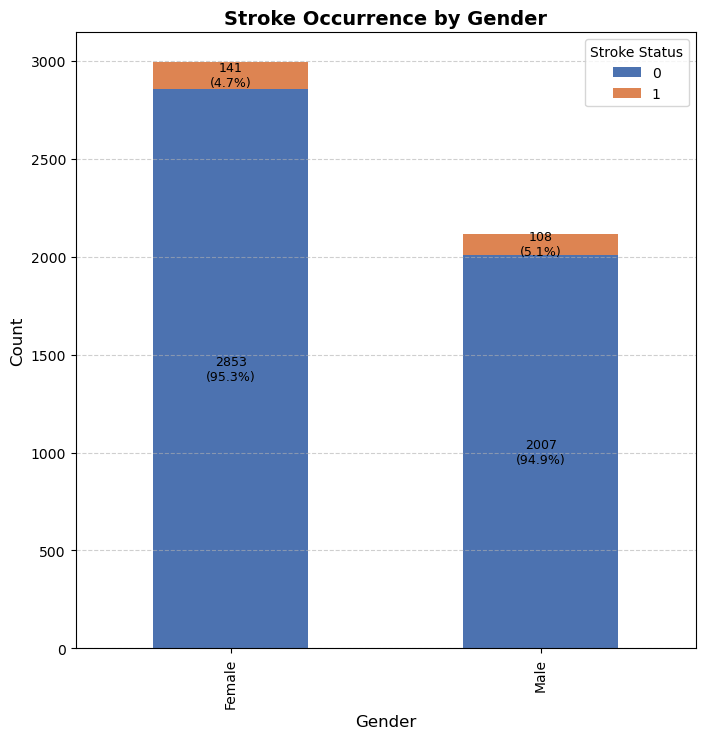

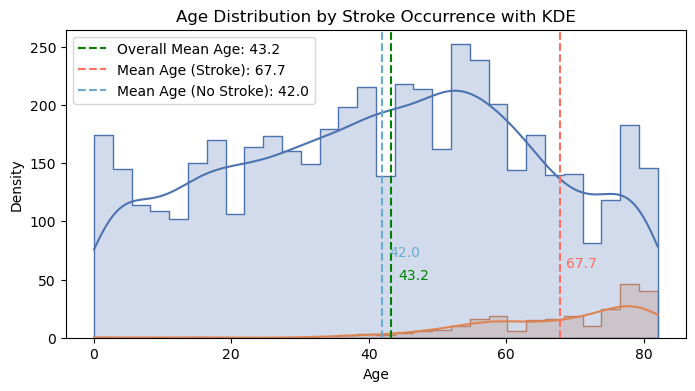

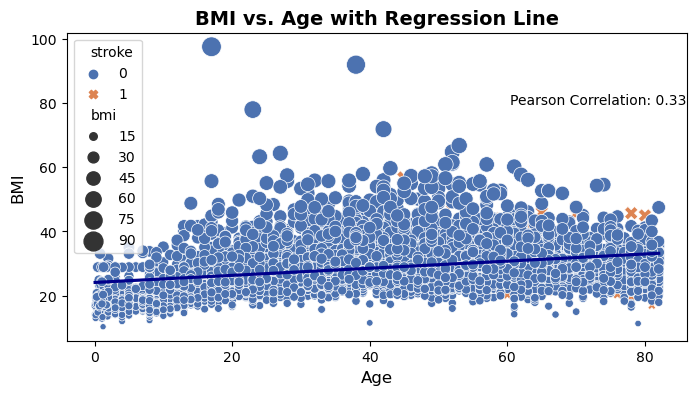

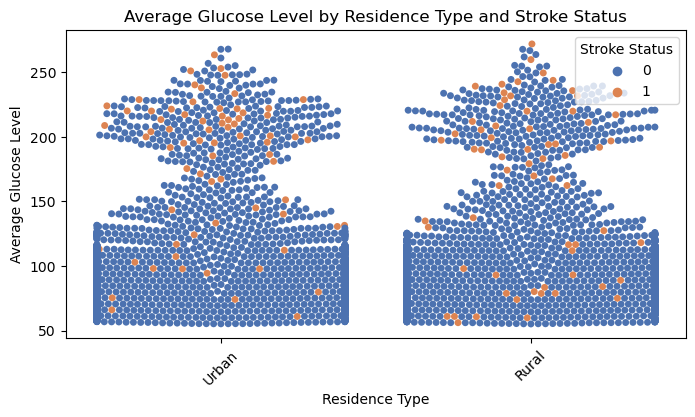

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Custom color palette
custom_palette = sns.color_palette("deep")

def load_and_preprocess_data(filepath):
    """
    Loads the healthcare dataset and prepares it for analysis by handling missing values
    and removing invalid entries. Missing BMI values are replaced with the mean BMI, 
    and entries with 'Other' gender are excluded.
    """
    data = pd.read_csv(filepath)
    data['bmi'].fillna(data['bmi'].mean(), inplace=True)  # Replace missing BMI values with the mean
    data['gender'] = data['gender'].replace('Other', pd.NA)  # Exclude 'Other' gender
    data.dropna(subset=['gender'], inplace=True)  # Drop rows with missing gender
    return data

def generate_summary_statistics(data, filename):
    """
    Calculates and saves summary statistics for the dataset, such as mean, standard deviation,
    and min/max values for numerical columns. The statistics are displayed and saved as a CSV file.
    """
    summary_statistics = data.describe()
    print("\nSummary Statistics:")
    print(summary_statistics)  # Show the summary statistics in the terminal
    summary_statistics.to_csv(filename, index=True)
    print(f"\nSummary statistics saved as '{filename}'")

def plot_stroke_occurrence_by_gender(data, save_path):
    """
    Creates a stacked bar chart showing the number of stroke and non-stroke cases
    for each gender. The chart includes raw counts and percentages within each bar.
    """
    stroke_gender = data.groupby(['gender', 'stroke']).size().unstack()
    fig, ax = plt.subplots(figsize=(8, 8))
    stroke_gender.plot(kind='bar', stacked=True, color=custom_palette, ax=ax)

    # Add percentages and raw counts inside the bars
    for gender_index, gender in enumerate(stroke_gender.index):
        cumulative_height = 0
        total = stroke_gender.loc[gender].sum()
        for stroke_status, count in enumerate(stroke_gender.loc[gender]):
            cumulative_height += count
            percentage = (count / total) * 100
            ax.text(gender_index, cumulative_height - (count / 2), 
                    f"{int(count)}\n({percentage:.1f}%)", ha='center', va='center', fontsize=9, color='black')

    # Add title, labels, and legend
    ax.set_title('Stroke Occurrence by Gender', fontsize=14, fontweight='bold')
    ax.set_xlabel('Gender', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Stroke Status', loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.savefig(save_path, dpi=300)
    plt.show()

def plot_age_distribution(data, save_path):
    """
    Plots the age distribution of individuals with and without strokes using a histogram
    and KDE (Kernel Density Estimation). Mean ages for all individuals, stroke cases, 
    and non-stroke cases are annotated on the chart.
    """
    plt.figure(figsize=(8, 4))
    overall_mean_age = data['age'].mean()
    mean_age_stroke = data[data['stroke'] == 1]['age'].mean()
    mean_age_no_stroke = data[data['stroke'] == 0]['age'].mean()

    sns.histplot(data, x='age', hue='stroke', kde=True, element='step', bins=30, palette=custom_palette)
    plt.axvline(overall_mean_age, color='green', linestyle='--', label=f'Overall Mean Age: {overall_mean_age:.1f}')
    plt.axvline(mean_age_stroke, color='#ff6f61', linestyle='--', label=f'Mean Age (Stroke): {mean_age_stroke:.1f}')
    plt.axvline(mean_age_no_stroke, color='#6aabd1', linestyle='--', label=f'Mean Age (No Stroke): {mean_age_no_stroke:.1f}')
    plt.text(overall_mean_age + 1, 50, f"{overall_mean_age:.1f}", color="green", fontsize=10)
    plt.text(mean_age_stroke + 1, 60, f"{mean_age_stroke:.1f}", color="#ff6f61", fontsize=10)
    plt.text(mean_age_no_stroke + 1, 70, f"{mean_age_no_stroke:.1f}", color="#6aabd1", fontsize=10)
    plt.title('Age Distribution by Stroke Occurrence with KDE')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(save_path, dpi=300)
    plt.show()

def plot_bmi_vs_age(data, save_path):
    """
    Generates a scatter plot of BMI vs. age, categorized by stroke status, with 
    a regression line to show trends. The correlation between age and BMI is also displayed.
    """
    plt.figure(figsize=(8, 4))
    scatter = sns.scatterplot(x='age', y='bmi', hue='stroke', data=data, style='stroke', markers=['o', 'X'], size='bmi', sizes=(20, 200), palette=custom_palette)
    sns.regplot(x='age', y='bmi', data=data, scatter=False, color='darkblue', ax=scatter)
    correlation, _ = pearsonr(data['age'], data['bmi'])
    plt.title('BMI vs. Age with Regression Line', fontsize=14, fontweight='bold')
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('BMI', fontsize=12)
    plt.figtext(0.9, 0.7, f"Pearson Correlation: {correlation:.2f}", horizontalalignment='right', fontsize=10)
    plt.savefig(save_path, dpi=300)
    plt.show()

def plot_avg_glucose_by_residence(data, save_path):
    """
    Creates a swarm plot to compare average glucose levels by residence type 
    (urban or rural), categorized by stroke status.
    """
    plt.figure(figsize=(8, 4))
    sns.swarmplot(x='Residence_type', y='avg_glucose_level', hue='stroke', data=data, palette=custom_palette)
    plt.title('Average Glucose Level by Residence Type and Stroke Status')
    plt.xlabel('Residence Type')
    plt.ylabel('Average Glucose Level')
    plt.xticks(rotation=45)
    plt.legend(title='Stroke Status', loc='upper right')
    plt.savefig(save_path, dpi=300)
    plt.show()

def main():
    """
    Main function to load and preprocess the dataset, generate summary statistics, 
    and create visualizations to analyze stroke risk factors.
    """
    data = load_and_preprocess_data('healthcare-dataset-stroke-data.csv')
    generate_summary_statistics(data, 'Summary_Statistics.csv')
    plot_stroke_occurrence_by_gender(data, 'Stroke_Occurrence_by_Gender_StackedBarChart_Annotated.png')
    plot_age_distribution(data, 'Age_Distribution_by_Stroke_Occurrence.png')
    plot_bmi_vs_age(data, 'BMI_vs_Age_with_Regression_Line.png')
    plot_avg_glucose_by_residence(data, 'Avg_Glucose_by_Residence_and_Stroke_ViolinPlot.png')

if __name__ == '__main__':
    main()
